## Testing and accuracy assessment of the implemented spam classifier.

### Classifier: Naive Multinomial Bayes classifier.

The tests will be performed on two datasets:

1. Dataset used for training (i.e., where word frequencies in different email categories were selected).
2. Dataset that has not been used before.

As parameters for the classifier, x will be used:

1. P(ham) and P(spam) - based on the ratios of ham and spam to the total number of emails in dataset #1.
2. P(ham) and P(spam) - based on the ratios of ham and spam to the total number of emails in dataset #2.
3. P(ham) and P(spam) - based on equal probabilities of ham and spam, i.e., 50% each (or 0.5 for both).

For all tests, the same smoothing factor will be used, set to 1, i.e., Laplace smoothing is applied.

<hr>

### Importing the necessary libraries and the implemented classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import SpamDetector

%matplotlib inline

#### Initializing variables with file path addresses.

In [2]:
path_to_email_dataset_1 = '../dataset/original_data/spam_ham_dataset.csv'
path_to_email_dataset_2 = '../dataset/test_data/emails.csv'

path_to_email_ratios_case_1 = '../dataset/test_data/email_ratios_case_1.csv'
path_to_email_ratios_case_2 = '../dataset/test_data/email_ratios_case_2.csv'
path_to_email_ratios_case_3 = '../dataset/test_data/email_ratios_case_3.csv'

path_to_dataset_word_frequencies = '../dataset/model_data/word_frequencies.csv'

#### Initialize variables to store the classification result.

Key Explanations:
- **ham-ham**: predicted as ham, expected ham -> correct.
- **ham-spam**: predicted as ham, expected spam -> incorrect.
- **spam-spam**: predicted as spam, expected spam -> correct.
- **spam-ham**: predicted as spam, expected ham -> incorrect.

In [3]:
result_dataset1_case1 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}
result_dataset1_case2 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}
result_dataset1_case3 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}

result_dataset2_case1 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}
result_dataset2_case2 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}
result_dataset2_case3 = {'ham-ham': 0, 'ham-spam': 0, 'spam-spam': 0, 'spam-ham': 0}

#### Initializing Naive Multinomial Bayes classifiers.

In [4]:
MultinomialNB_case1 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_1)
MultinomialNB_case2 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_2)
MultinomialNB_case3 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_3)

#### Visualizing three cases of probabilities P(ham) and P(spam).

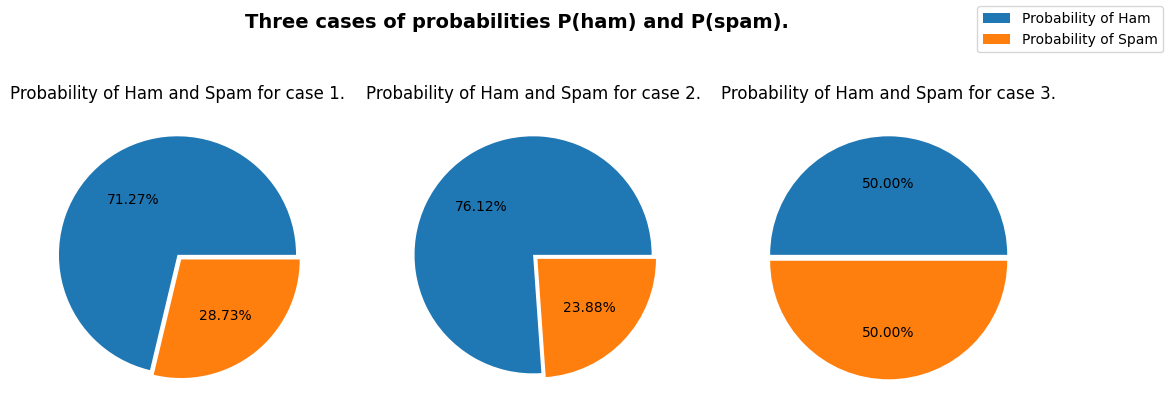

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (13, 5))

fig.suptitle('Three cases of probabilities P(ham) and P(spam).', fontsize=14, fontweight='bold')

case1 = pd.read_csv(path_to_email_ratios_case_1, index_col=0)
case2 = pd.read_csv(path_to_email_ratios_case_2, index_col=0)
case3 = pd.read_csv(path_to_email_ratios_case_3, index_col=0)

ax[0].set_title("Probability of Ham and Spam for case 1.", fontsize=12)
ax[1].set_title("Probability of Ham and Spam for case 2.", fontsize=12)
ax[2].set_title("Probability of Ham and Spam for case 3.", fontsize=12)

ax[0].pie([case1.ham['ratios-to-total-emails'], case1.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')
ax[1].pie([case2.ham['ratios-to-total-emails'], case2.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')
ax[2].pie([case3.ham['ratios-to-total-emails'], case3.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')

fig.legend(labels=["Probability of Ham", "Probability of Spam"], loc='upper right')

plt.show()

<hr>

#### Implementation of a function calculating classification results.

In [6]:
def calculating_classification_results(data: dict[str, int], predicted_result: int, expected_result: int) -> dict[str, int]:
    """
    Function for calculating classification results and updating the data dictionary of classifier results.

    Parameters:
        data (dict[str, int]): Dictionary for counting different result combinations (the keys of the dictionary should be the following: 'ham-ham', 'ham-spam', 'spam-spam', 'spam-ham'.).
        predicted_result (int): Predicted result (0 for ham, 1 for spam).
        expected_result (int): Expected result (0 for ham, 1 for spam).

    Returns:
        dict[str, int]: Updated data dictionary.
    """

    if predicted_result == 0 and expected_result == 0: # Predicted as ham, expected ham -> correct
        data['ham-ham'] += 1
        return data
    
    if predicted_result == 1 and expected_result == 0: # Predicted as spam, expected ham -> incorrect
        data['spam-ham'] += 1
        return data
    
    if predicted_result == 1 and expected_result == 1: # Predicted as spam, expected spam -> correct
        data['spam-spam'] += 1
        return data
    
    if predicted_result == 0 and expected_result == 1: # Predicted as ham, expected spam -> incorrect
        data['ham-spam'] += 1
        return data

<hr>

### Testing the classifier on dataset 1.

#### Loading the dataset and preparing columns for testing.

In [7]:
dataset1 = pd.read_csv(path_to_email_dataset_1)
dataset1 = dataset1.drop(['Unnamed: 0', 'label'], axis = 1)
dataset1 = dataset1.rename(columns={'label_num': 'label'})
dataset1

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


#### Testing...

In [8]:
for i in range(len(dataset1)):
    result_dataset1_case1 = calculating_classification_results(result_dataset1_case1, MultinomialNB_case1.detecting_spam(dataset1.text[i]), dataset1.label[i]) 
    result_dataset1_case2 = calculating_classification_results(result_dataset1_case2, MultinomialNB_case2.detecting_spam(dataset1.text[i]), dataset1.label[i])
    result_dataset1_case3 = calculating_classification_results(result_dataset1_case3, MultinomialNB_case3.detecting_spam(dataset1.text[i]), dataset1.label[i])

#### Visualization of test results.

In [9]:
# TO DO: Create visualization.
print(f"result_dataset1_case1 = {result_dataset1_case1}")
print(f"result_dataset1_case2 = {result_dataset1_case2}")
print(f"result_dataset1_case3 = {result_dataset1_case3}")

result_dataset1_case1 = {'ham-ham': 3474, 'ham-spam': 38, 'spam-spam': 1461, 'spam-ham': 198}
result_dataset1_case2 = {'ham-ham': 3477, 'ham-spam': 42, 'spam-spam': 1457, 'spam-ham': 195}
result_dataset1_case3 = {'ham-ham': 3469, 'ham-spam': 27, 'spam-spam': 1472, 'spam-ham': 203}


<hr>

### Testing the classifier on dataset 2.
#### Loading the dataset and preparing columns for testing.

In [10]:
dataset2 = pd.read_csv(path_to_email_dataset_2)
dataset2 = dataset2.rename(columns={'spam': 'label'})
dataset2

,text,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


#### Testing...

In [11]:
for i in range(len(dataset2)):
    result_dataset2_case1 = calculating_classification_results(result_dataset2_case1, MultinomialNB_case1.detecting_spam(dataset2.text[i]), dataset2.label[i]) 
    result_dataset2_case2 = calculating_classification_results(result_dataset2_case2, MultinomialNB_case2.detecting_spam(dataset2.text[i]), dataset2.label[i])
    result_dataset2_case3 = calculating_classification_results(result_dataset2_case3, MultinomialNB_case3.detecting_spam(dataset2.text[i]), dataset2.label[i])

#### Visualization of test results.

In [12]:
# TO DO: Create visualization.
print(f"result_dataset2_case1 = {result_dataset2_case1}")
print(f"result_dataset2_case2 = {result_dataset2_case2}")
print(f"result_dataset2_case3 = {result_dataset2_case3}")

result_dataset2_case1 = {'ham-ham': 2238, 'ham-spam': 24, 'spam-spam': 1344, 'spam-ham': 2122}
result_dataset2_case2 = {'ham-ham': 2263, 'ham-spam': 24, 'spam-spam': 1344, 'spam-ham': 2097}
result_dataset2_case3 = {'ham-ham': 2162, 'ham-spam': 19, 'spam-spam': 1349, 'spam-ham': 2198}


<hr>